In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
import statsmodels.api as sm
%matplotlib inline
pd.set_option('display.max_rows', None)
import scipy.stats as stats
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
from scipy.stats import shapiro
from numpy import random

In [3]:
# Importing data
df = pd.read_csv(r"C:\Users\gdbt0\OneDrive\Documents\GitHub\Projects\cancer\data\processed\hrctv_volume_vs_eqd2_brachy_dose.csv")
hrctv_volume = df['hrctv_volume']
eqd2_hrbrachy_dose = df['eqd2_hrbrachy_dose']
df.info()

## Descriptive statistics

### hrctv_volume

count    85.000000
mean     28.834118
std       9.923476
min      10.500000
25%      21.500000
50%      26.500000
75%      33.900000
max      65.900000
Name: hrctv_volume, dtype: float64

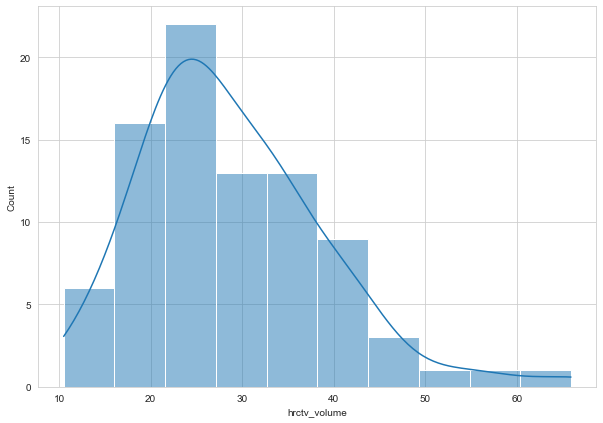

In [3]:
plt.figure(figsize=(10,7))
sns.histplot(hrctv_volume,kde=True,bins=10)
hrctv_volume.describe()

In [4]:
#Testing for normality
alpha = 0.05
statistic,p_value = shapiro(hrctv_volume)
print ("Testing values of hrctv_3B_volume for normality using the Shapiro-Wilk test."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing values of hrctv_3B_volume for normality using the Shapiro-Wilk test.
The test statistic is: 0.9469279050827026. The p_value is: 0.0015793991042301059.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis can be rejected because the p value is less than alpha.


The Shapiro-Wilk test for normality has failed. The graph above looks similar to the Poisson distribution. In comparison, a Poisson distribution with a similar mean value as the values of hrctv_volume look like the graph below.

Visualising a Poisson distribution with the same lambda value as the mean of hrctv_volume

C:\Users\gdbt0\anaconda3\envs\cancer\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

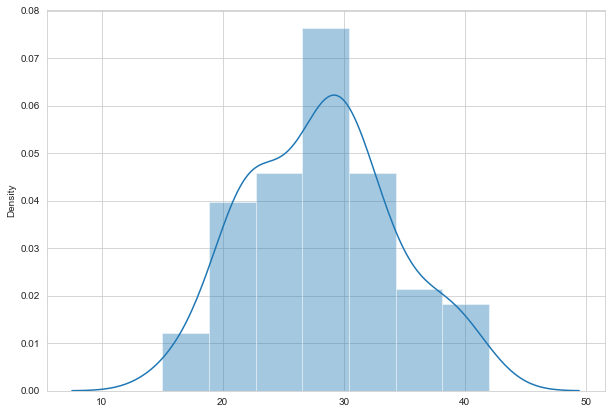

In [5]:
plt.figure(figsize=(10,7))
sns.distplot(random.poisson(lam=28.83, size=85), kde=True)

It is hard to estimate whether two graphs appear similarly. Therefore, a quantitative approach needed if we want to test whether the distribution of hrctv_volume follows a Poisson distribution.

### eqd2_hrbrachy_dose

count    85.000000
mean     36.896471
std       2.069935
min      29.400000
25%      35.800000
50%      36.700000
75%      38.300000
max      39.900000
Name: eqd2_hrbrachy_dose, dtype: float64

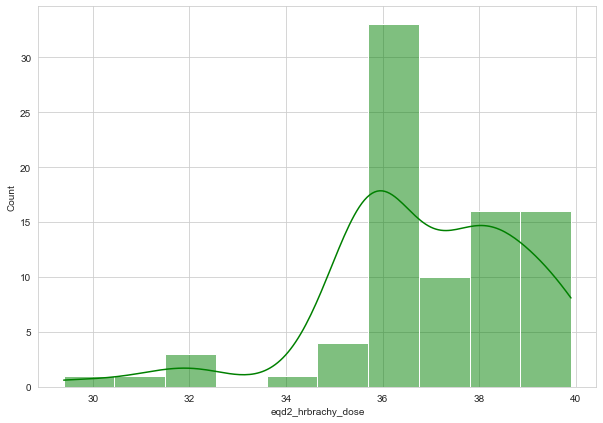

In [6]:
plt.figure(figsize=(10,7))
sns.histplot(eqd2_hrbrachy_dose, kde=True, bins=10, color='green')
eqd2_hrbrachy_dose.describe()

In [7]:
#Testing for normality
alpha = 0.05
statistic,p_value = shapiro(eqd2_hrbrachy_dose)
print ("Testing values of eqd2_hrbrachy_dose for normality using the Shapiro-Wilk test."+"\nThe test statistic is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The sample comes from a normal distribution."+"\nHA = The sample is not coming from normal distribution."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")


Testing values of eqd2_hrbrachy_dose for normality using the Shapiro-Wilk test.
The test statistic is: 0.897770345211029. The p_value is: 5.586150109593291e-06.
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from normal distribution.
The alpha is: 0.05
The null hypothesis can be rejected because the p value is less than alpha.


In [8]:
# Calculating correlation coefficient between two variables

corrcoef = np.corrcoef(hrctv_volume,eqd2_hrbrachy_dose)[0,1]
print("The correlation coefficient between hrctv_volume, eqd2_hrbrachy_dose is {}.".format(corrcoef))

The correlation coefficient between hrctv_volume, eqd2_hrbrachy_dose is 0.22987778086236083.


The linear correlation between two variable is a weak positive 0.2298.

Let's test if this correlation is statistically significant. To do this, we can calculate the p-value associated with the Pearson correlation coefficient. The p-value is 0.03 which is less than the alpha=0.05. Therefore, the correlation coefficient value is statistically significant.

In [9]:
alpha = 0.05
statistic,p_value = pearsonr(hrctv_volume,eqd2_hrbrachy_dose)
print ("Testing the Pearson's correlation between values of hrctv_volume and edq2_hrbrachy_dose."+"\nThe test statistics or the correlation coefficient is: {}. The p_value is: {}.".format(statistic,p_value))
print("H0 = The correlation is not statistically significant."+"\nHA = The correlation is statistically significant."+"\nThe alpha is: 0.05")
if p_value < alpha:
    print("The null hypothesis can be rejected because the p value is less than alpha.")
else:
    print("The null hypothesis cannot be rejected because the p value is more than alpha.")

Testing the Pearson's correlation between values of hrctv_volume and edq2_hrbrachy_dose.
The test statistics or the correlation coefficient is: 0.22987778086236083. The p_value is: 0.034309109274396205.
H0 = The correlation is not statistically significant.
HA = The correlation is statistically significant.
The alpha is: 0.05
The null hypothesis can be rejected because the p value is less than alpha.


Let's take a look at the scatter plot between the variables. In the x-axis we have hrctv_volume, in the y-axis we have eqd2_hrbrachy_dose. On the scatterplot below we can notice a weak positive relationship.

<AxesSubplot:xlabel='hrctv_volume', ylabel='eqd2_hrbrachy_dose'>

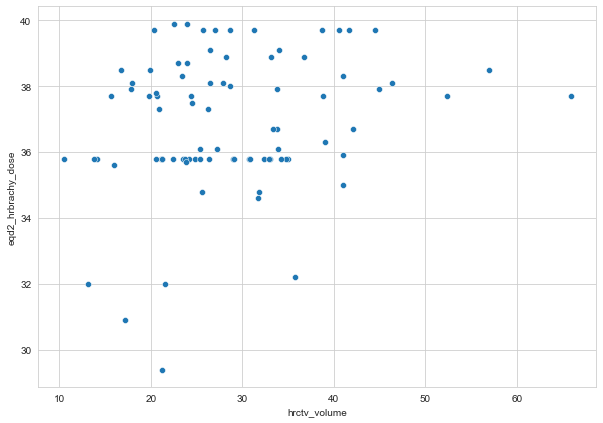

In [10]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='hrctv_volume', y='eqd2_hrbrachy_dose')

Now, let's see if there is a statistically significant relationship between the two sets of variables using a OLS Linear regression model.

In [11]:
# Ordinary Least squares regression modelling
Y = eqd2_hrbrachy_dose
X = hrctv_volume
X = sm.add_constant(hrctv_volume)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     eqd2_hrbrachy_dose   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     4.631
Date:                Wed, 17 Nov 2021   Prob (F-statistic):             0.0343
Time:                        22:10:34   Log-Likelihood:                -179.64
No. Observations:                  85   AIC:                             363.3
Df Residuals:                      83   BIC:                             368.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           35.5139      0.679     52.299      0.000      34.163      36.864
hrctv_volume     0.0480      0.022      2.152      0.034       0.004       0.092
==============================================================================
Omnibus:                       13.368   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.321
Skew:                          -0.816   Prob(JB):                     0.000471
Kurtosis:                       4.291   Cond. No.                         94.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, let's interpret the results of the simple regression model.

Simple linear regression was used to test if hrctv_volume significantly predicted eqd2_hrbrachy_dose.
The fitted regression model was:

eqd2_hrbrachy_dose = 35.5139 + 0.0480 * hrctv_volume

The overall regression was statistically significant (R-squared = 0.053, F(1,83) = 4.631, p = 0.0343).

R-squared represents the proportion of the variance in the eqd2_hrbrachy_dose based on the values of hrctv_volume. In other words, it shows how well the data fit the model. Small R-squared = 0.052 imply that only 5.2% of hrctv_volume values are impacting eqd2_hrbrachy_dose in the Simple Regression model.

It was found that hrctv_volume significantly predicted eqd2_hrbrachy_dose (β = 0.048, p = 0.034). The p-value is lower than alpha indicating that the variable is meaningful and suggests that changes in the hrctv_volume are related to the changes in the eqd2_hrbrachy_dose. The coefficent of hrctv_volume in the model is only 0.048 which means only 4.8% of values of hrctv_volume are used in the prediction of the values of eqd2_hrbrachy_dose.

In summary, the regression model and the independent variable are statistically significant. However, the low R-squared value and the low coefficient of the independent variable indicate that hrctv_volume is not accounting much for eqd2_hrbrachy_dose in the model.

The fitted OLS regression model graph looks like below.

<AxesSubplot:xlabel='hrctv_volume', ylabel='eqd2_hrbrachy_dose'>

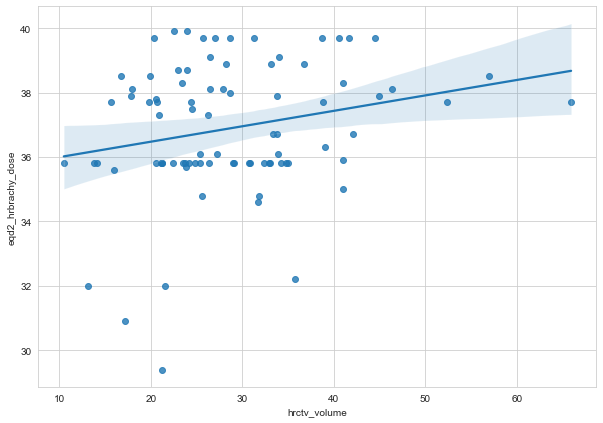

In [12]:
plt.figure(figsize=(10,7))
sns.regplot(data=df, x='hrctv_volume', y='eqd2_hrbrachy_dose')

The graph illustrates the fitted model on the scatter plot of our data. It looks like there are three outlier data points that are impacting our model. Let's get rid of these data points and analyse the data again.

In [13]:
df_adjusted_for_outl = df.loc[df['hrctv_volume']<50]

In [14]:
# Ordinary Least squares regression modelling with cleaned data
y = df_adjusted_for_outl['eqd2_hrbrachy_dose']
x = df_adjusted_for_outl['hrctv_volume']
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     eqd2_hrbrachy_dose   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.869
Date:                Wed, 17 Nov 2021   Prob (F-statistic):             0.0526
Time:                        22:10:34   Log-Likelihood:                -174.60
No. Observations:                  82   AIC:                             353.2
Df Residuals:                      80   BIC:                             358.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           35.3359      0.806     43.829      0.000      33.731      36.940
hrctv_volume     0.0548      0.028      1.967      0.053      -0.001       0.110
==============================================================================
Omnibus:                       12.118   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.086
Skew:                          -0.803   Prob(JB):                      0.00144
Kurtosis:                       4.120   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='hrctv_volume', ylabel='eqd2_hrbrachy_dose'>

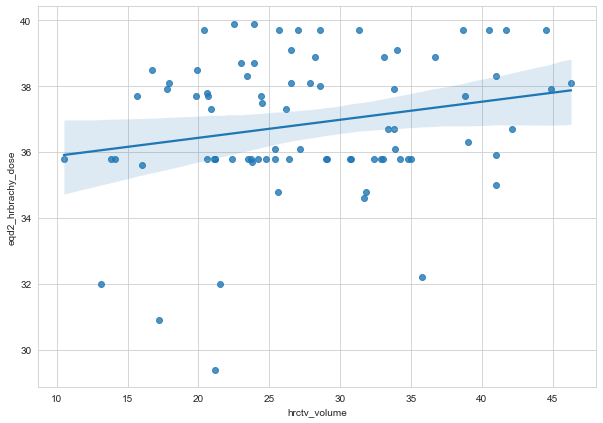

In [15]:
plt.figure(figsize=(10,7))
sns.regplot(data=df_adjusted_for_outl, x='hrctv_volume', y='eqd2_hrbrachy_dose')

The model has p-values higher than the alpha. Therefore, the model is not statistically significant. Therefore, the outliers do not affect the model.